# Particle Swarm Optimization

...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pso import PSO
from functions import sphere, rastringin, ackley

...

## Variar o tamanho do enxame no intervalo [30 - 100] em passos de 10.

* Mostrar resultado em um gráfico com tamanho do enxame vs. melhor fitness encontrado;

* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções

### Sphere

In [2]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# variando o número de partículas
for n in range(30, 101, 10):
    pso = PSO(sphere, bounds, num_particles=n, maxiter=100)
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [3]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# variando o número de partículas
for n in range(30, 101, 10):
    pso = PSO(rastringin, bounds, num_particles=n, maxiter=100)
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [4]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# variando o número de partículas
for n in range(30, 101, 10):
    pso = PSO(ackley, bounds, num_particles=n, maxiter=100)
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

### Resultados

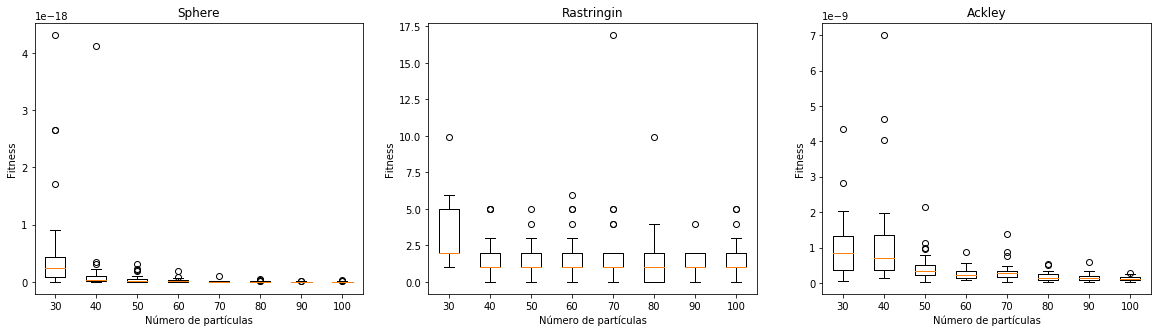

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Número de partículas")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Número de partículas")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Número de partículas")

plt.show()

## Variar o valor de inércia no intervalo [0,1 - 0,9] em passos de 0,1.

* Mostrar resultado em um gráfico com valor de inércia e vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções

## Variar topologia entre as opções: global e local com 2 vizinhos.

* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness
encontrado
* Terão duas séries neste gráfico, uma para cada tipo de topologia
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).

In [6]:
num_iter=30
num_exec=30

### Sphere

In [7]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_g = []
sphere_best_fitnesses_l = []
sphere_iter_results_g = [[] for i in range(num_iter)]
sphere_iter_results_l = [[] for i in range(num_iter)]
sphere_iter_mean_g = []
sphere_iter_mean_l = []
sphere_iter_std_g = []
sphere_iter_std_l = []

# executando o algoritmo na topologia global 30 vezes
pso_g = PSO(sphere, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    sphere_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executando o algoritmo na topologia local 30 vezes
pso_l = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    sphere_best_fitnesses_l.append(execution_best_fitnesses_l)

# agrupando os resultados por número de iteração
for i in range(len(sphere_best_fitnesses_g)):
    for j in range(len(sphere_best_fitnesses_g[i])):
        sphere_iter_results_g[j].append(sphere_best_fitnesses_g[i][j])
        sphere_iter_results_l[j].append(sphere_best_fitnesses_l[i][j])
        
# calculando a média e desvio padrão por número de iteração
for i in range(len(sphere_iter_results_g)):
    sphere_iter_mean_g.append(np.mean(sphere_iter_results_g[i]))
    sphere_iter_std_g.append(np.std(sphere_iter_results_g[i]))
    
    sphere_iter_mean_l.append(np.mean(sphere_iter_results_l[i]))
    sphere_iter_std_l.append(np.std(sphere_iter_results_l[i]))

### Rastringin

In [8]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_g = []
rastringin_best_fitnesses_l = []
rastringin_iter_results_g = [[] for i in range(num_iter)]
rastringin_iter_results_l = [[] for i in range(num_iter)]
rastringin_iter_mean_g = []
rastringin_iter_mean_l = []
rastringin_iter_std_g = []
rastringin_iter_std_l = []

# executando o algoritmo na topologia global 30 vezes
pso_g = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    rastringin_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executando o algoritmo na topologia local 30 vezes
pso_l = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    rastringin_best_fitnesses_l.append(execution_best_fitnesses_l)

# agrupando os resultados por número de iteração
for i in range(len(rastringin_best_fitnesses_g)):
    for j in range(len(rastringin_best_fitnesses_g[i])):
        rastringin_iter_results_g[j].append(rastringin_best_fitnesses_g[i][j])
        rastringin_iter_results_l[j].append(rastringin_best_fitnesses_l[i][j])
        
# calculando a média e desvio padrão por número de iteração
for i in range(len(rastringin_iter_results_g)):
    rastringin_iter_mean_g.append(np.mean(rastringin_iter_results_g[i]))
    rastringin_iter_std_g.append(np.std(rastringin_iter_results_g[i]))
    
    rastringin_iter_mean_l.append(np.mean(rastringin_iter_results_l[i]))
    rastringin_iter_std_l.append(np.std(rastringin_iter_results_l[i]))

### Ackley

In [9]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_g = []
ackley_best_fitnesses_l = []
ackley_iter_results_g = [[] for i in range(num_iter)]
ackley_iter_results_l = [[] for i in range(num_iter)]
ackley_iter_mean_g = []
ackley_iter_mean_l = []
ackley_iter_std_g = []
ackley_iter_std_l = []

# executando o algoritmo na topologia global 30 vezes
pso_g = PSO(ackley, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    ackley_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executando o algoritmo na topologia local 30 vezes
pso_l = PSO(ackley, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    ackley_best_fitnesses_l.append(execution_best_fitnesses_l)

# agrupando os resultados por número de iteração
for i in range(len(ackley_best_fitnesses_g)):
    for j in range(len(ackley_best_fitnesses_g[i])):
        ackley_iter_results_g[j].append(ackley_best_fitnesses_g[i][j])
        ackley_iter_results_l[j].append(ackley_best_fitnesses_l[i][j])
        
# calculando a média e desvio padrão por número de iteração
for i in range(len(ackley_iter_results_g)):
    ackley_iter_mean_g.append(np.mean(ackley_iter_results_g[i]))
    ackley_iter_std_g.append(np.std(ackley_iter_results_g[i]))
    
    ackley_iter_mean_l.append(np.mean(ackley_iter_results_l[i]))
    ackley_iter_std_l.append(np.std(ackley_iter_results_l[i]))

### Resultados

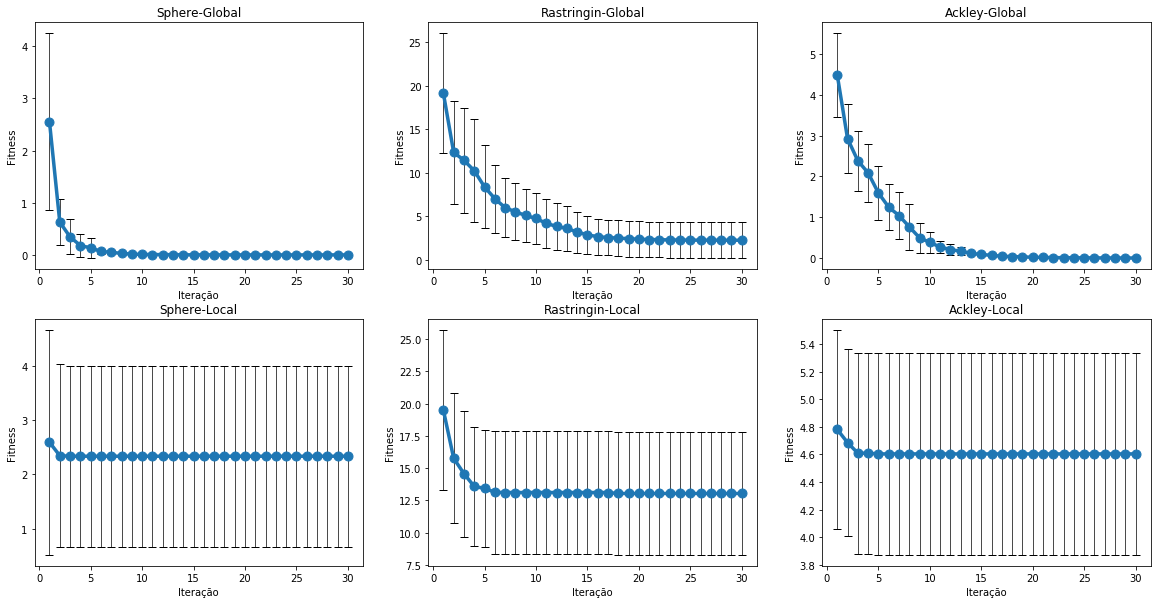

In [10]:
x = np.arange(1, num_iter+1, 1)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.errorbar(x, np.array(sphere_iter_mean_g), np.array(sphere_iter_std_g), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Sphere-Global')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.subplot(2, 3, 2)
plt.errorbar(x, np.array(rastringin_iter_mean_g), np.array(rastringin_iter_std_g), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Rastringin-Global')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.subplot(2, 3, 3)
plt.errorbar(x, np.array(ackley_iter_mean_g), np.array(ackley_iter_std_g), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Ackley-Global')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.subplot(2, 3, 4)
plt.errorbar(x, np.array(sphere_iter_mean_l), np.array(sphere_iter_std_l), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Sphere-Local')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.subplot(2, 3, 5)
plt.errorbar(x, np.array(rastringin_iter_mean_l), np.array(rastringin_iter_std_l), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Rastringin-Local')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.subplot(2, 3, 6)
plt.errorbar(x, np.array(ackley_iter_mean_l), np.array(ackley_iter_std_l), ms=9, lw=3.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7)
plt.title('Ackley-Local')
plt.ylabel("Fitness")
plt.xlabel("Iteração")

plt.show() 

## Variar a fórmula de atualização da velocidade entre as opções: tradicional e com fator de restrição.
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão duas séries neste gráfico
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).